In [18]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from scipy import interpolate
%matplotlib inline

Vamos interpolar a função de Runge, $f(x) = \frac{1}{1+25x^2}$, num conjunto de $n$ nós regularmente espaçados

$$
x_k = -1 + \frac{2(k-1)}{n-1}, \; \; k = 1,2, \ldots , n
$$

4 - Agora utilize splines cúbicos e calcule o polinomio de interpolação $S(x)$ para 41 pontos regularmente espaçados. Os pontos conhecidos iniciais são 4 tal como no ponto 1. Repita para 6 e para 8 pontos igualmente espaçados. Calcule o erro, $\epsilon = \frac{f(x) - S(x)}{f(x)}$. O aumento de número de pontos conhecidos melhora a interpolação?

Text(0.5, 1.0, 'Para n=6 usando splrep')

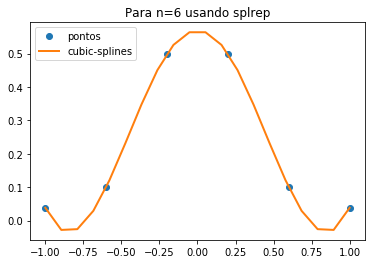

In [46]:
#para n=6
n = 6
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

tck = interpolate.splrep(xk, yk, s=0)

xnovo = np.linspace(-1,1,20)

ycs = interpolate.splev(xnovo, tck, der=0)

#Gráfico para n=6
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=6 usando splrep')

In [47]:
#calculo do erro para n=6
ycs_2der = interpolate.splev(xk, tck, der=2)
erro = np.mean((yk - ycs_2der)/(yk))

print("O erro para n=", n, "é:", erro)

O erro para n= 6 é: -70.10256410256407


Text(0.5, 1.0, 'Para n=6 usando interp1d')

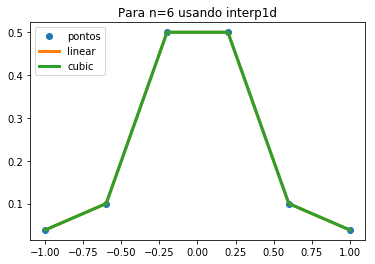

In [8]:
#usando interp1d para n=6
f1= interp1d(xk, yk, kind='linear')
f3 = interp1d(xk, yk, kind='cubic')

plt.plot(xk,yk,'o', label='pontos')
plt.plot(xk,f1(xk),label='linear',lw=3)
plt.plot(xk,f3(xk),label='cubic',lw=3)
plt.legend(loc=2)
plt.title('Para n=6 usando interp1d')

Text(0.5, 1.0, 'Para n=8 usando splrep')

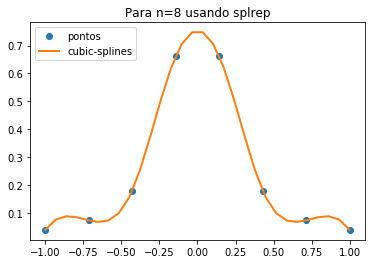

In [44]:
#para n = 8
n= 8
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))
    
tck = interpolate.splrep(xk, yk, s=0)

xnovo = np.linspace(-1,1,30)

ycs = interpolate.splev(xnovo, tck, der=0)

# Agora podemos graficar
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=8 usando splrep')

In [45]:
#calculo do erro para n=8
ycs_2der = interpolate.splev(xk, tck, der=2)
erro = np.mean((yk - ycs_2der)/(yk))

print("O erro para n=", n, "é:", erro)

O erro para n= 8 é: 35.46007353000649


Text(0.5, 1.0, 'Para n=41 usando splrep')

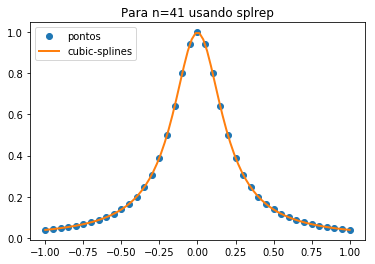

In [39]:
#para n = 41
n = 41
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))
    
xnovo = np.linspace(-1,1,80)

tck = interpolate.splrep(xk, yk, s=0)

ycs = interpolate.splev(xnovo, tck, der=0)

# Agora podemos graficar
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=41 usando splrep')

In [43]:
#calculo do erro para n=41
ycs_2der = interpolate.splev(xk, tck, der=2)
erro = np.mean((yk - ycs_2der)/(yk))

print("O erro para n=", n, "é:", erro)

O erro para n= 41 é: -8.777133470377251


5 - Calcule o erro, $\epsilon = \frac{f(x) - S(x)}{f(x)}$. O aumento de número de pontos conhecidos melhora a interpolação?

In [243]:
"""for k in range(1,n+1):
    for i in range(1,k):
        x[i] = """

'for k in range(1,n+1):\n    for i in range(1,k):\n        x[i] = '

In [244]:
"""n = 6
xk = []
for k in range(1,n+1):
    x = [-1 + 2*(k-1)/n-1]
    xk.append((k,x))
    print(x)
    
y= 1/(1+25*xk**2)
    """

'n = 6\nxk = []\nfor k in range(1,n+1):\n    x = [-1 + 2*(k-1)/n-1]\n    xk.append((k,x))\n    print(x)\n    \ny= 1/(1+25*xk**2)\n    '

In [205]:
n=41
x = np.linspace(1,10,n)
y = 1/(1+25*x**2)
f3 = interp1d(x,y kind='cubic')

plt.plot(dados,'o', label='pontos')
plt.plot(x,f3(x),label='cubic',lw=3)
plt.legend(loc=3)


TypeError: __init__() missing 1 required positional argument: 'y'

In [142]:
tck = interpolate.splrep(x, y, s=0)
tck

(array([ 1.   ,  1.   ,  1.   ,  1.   ,  1.45 ,  1.675,  1.9  ,  2.125,
         2.35 ,  2.575,  2.8  ,  3.025,  3.25 ,  3.475,  3.7  ,  3.925,
         4.15 ,  4.375,  4.6  ,  4.825,  5.05 ,  5.275,  5.5  ,  5.725,
         5.95 ,  6.175,  6.4  ,  6.625,  6.85 ,  7.075,  7.3  ,  7.525,
         7.75 ,  7.975,  8.2  ,  8.425,  8.65 ,  8.875,  9.1  ,  9.325,
         9.55 , 10.   , 10.   , 10.   , 10.   ]),
 array([0.03846154, 0.02776108, 0.01976613, 0.01381209, 0.01081403,
        0.00868521, 0.00712726, 0.00595182, 0.0050441 , 0.00432864,
        0.00375491, 0.00328788, 0.00290269, 0.00258132, 0.00231042,
        0.00207997, 0.00188232, 0.00171152, 0.00156293, 0.00143287,
        0.00131837, 0.00121706, 0.00112698, 0.00104654, 0.00097441,
        0.00090948, 0.00085083, 0.00079767, 0.00074934, 0.00070527,
        0.00066497, 0.00062803, 0.00059408, 0.00056282, 0.00053395,
        0.00050725, 0.00048251, 0.00045953, 0.00043102, 0.00041183,
        0.00039984, 0.        , 0.        , 0.

1. Considere $n = 5, 11, 21, 30$ e calcule os polinomios de intepolação de Lagrange $P_N (x)$ para 41 pontos regularmente espaçados.


In [66]:
erro1 = (y-Pn)/y

erro2 = (y-S)/y

NameError: name 'Pn' is not defined